In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
feriados = pd.read_csv("data/holidays_events.csv", sep=',')
oleo = pd.read_csv("data/oil.csv", sep=",")
lojas = pd.read_csv("data/stores.csv", sep=",")
transacoes = pd.read_csv("data/transactions.csv")
dados_treino = pd.read_csv("data/train.csv", sep=",", index_col="id")

# Analises Preliminares

In [10]:
dados_treino.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
dados_treino.dtypes

date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [5]:
dados_treino.isna().sum().sum()

0

In [7]:
dados_treino.count().sum()

15004440

dados_treino:
- sem existem dados nulos
- mudar tipo da data

In [9]:
transacoes.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
transacoes.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [12]:
transacoes.isna().sum().sum()

0

transacoes:
- sem dados nulos
- mudar tipo da data

In [13]:
lojas.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
lojas.dtypes

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

In [14]:
lojas.isna().sum().sum()

0

lojas:
- sem dados nulos

In [16]:
oleo.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [17]:
oleo.isna().sum().sum()

43

In [18]:
oleo.dtypes

date           object
dcoilwtico    float64
dtype: object

oleo: 
- tratar dados nulos
- alterar o tipo da coluna data

In [19]:
feriados.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [20]:
feriados.isna().sum().sum()

0

In [22]:
feriados.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [23]:
feriados['transferred'].value_counts()

transferred
False    338
True      12
Name: count, dtype: int64

feriados:
- mudar o tipo da coluna data
- registar os dados onde o feriado foi alterado

# Tratando Dados
- mudar o tipo da coluna data dos datasets: dados_treino, transacoes, feriados, oleo
- tratar os dados nulos do dataset oleo 

In [28]:
dados_treino["date"] = pd.to_datetime(dados_treino["date"])
transacoes["date"] = pd.to_datetime(transacoes["date"])
feriados["date"] = pd.to_datetime(feriados["date"])
oleo["date"] = pd.to_datetime(oleo["date"])

In [29]:
oleo.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [36]:
oleo["dcoilwtico"].describe()

count    1175.000000
mean       67.714366
std        25.630476
min        26.190000
25%        46.405000
50%        53.190000
75%        95.660000
max       110.620000
Name: dcoilwtico, dtype: float64

<Axes: xlabel='date', ylabel='dcoilwtico'>

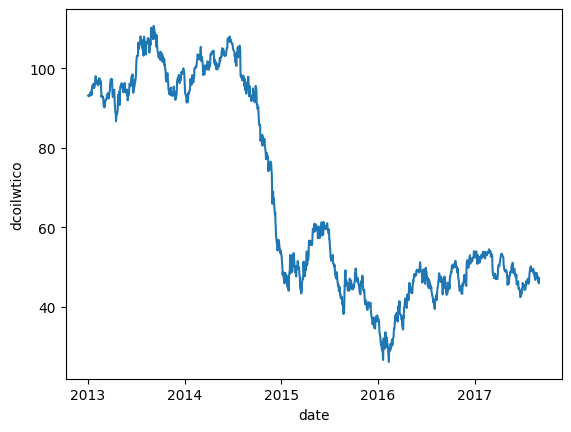

In [38]:
sns.lineplot(data=oleo, y ="dcoilwtico", x='date')

In [49]:
oleo

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [50]:
oleo_fill = oleo.fillna(oleo["dcoilwtico"].rolling(3, 1).mean())

<Axes: xlabel='date', ylabel='dcoilwtico'>

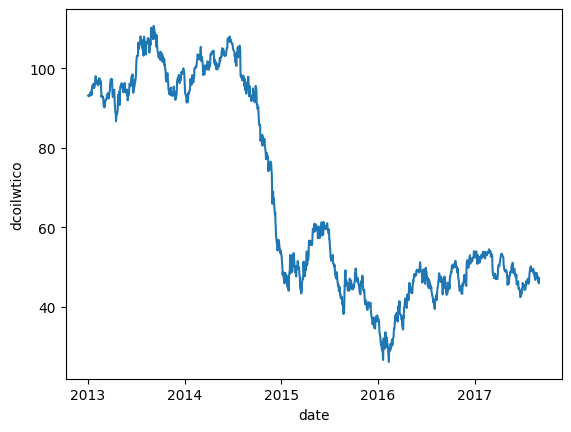

In [51]:
sns.lineplot(data=oleo_fill, y ="dcoilwtico", x='date')